In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/Users/gauravjangid/Desktop/Data Science/data set/newplacementdata.csv")

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

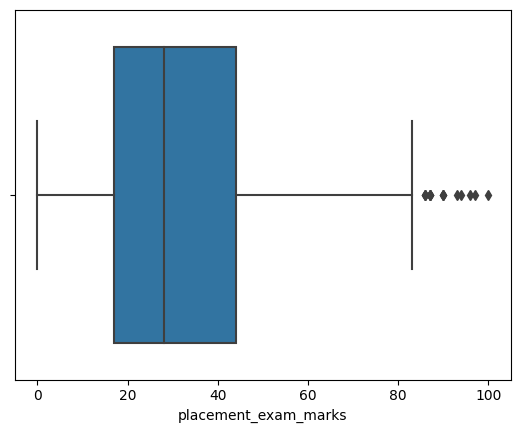

In [8]:
 sns.boxplot(x=df['placement_exam_marks'])

In [9]:
#finding IQR

In [10]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [11]:
percentile25

17.0

In [12]:
percentile75

44.0

In [13]:
IQR=percentile75-percentile25

In [14]:
IQR

27.0

In [16]:
upper_limit=percentile75+1.5*IQR
upper_limit

84.5

In [17]:
lower_limit=percentile25-1.5*IQR
lower_limit

-23.5

In [18]:
#finding outliers

In [19]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [20]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [21]:
#trimming 

In [22]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [23]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


<Axes: >

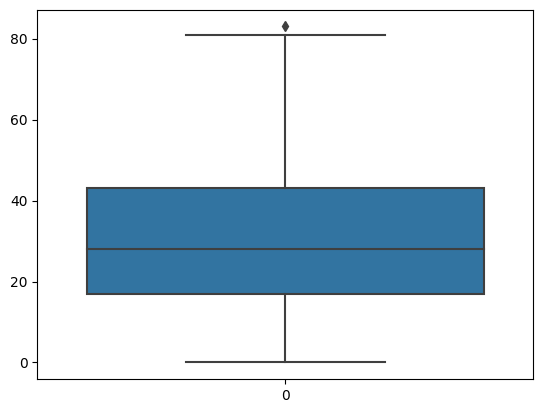

In [24]:
#comparison
sns.boxplot(new_df['placement_exam_marks'])

<Axes: xlabel='placement_exam_marks'>

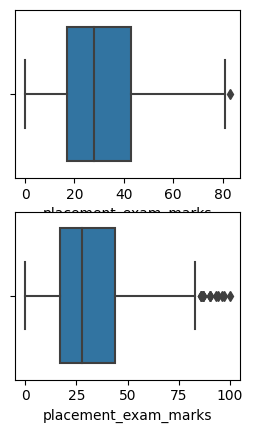

In [26]:
plt.Figure(figsize=(15,5))

plt.subplot(222)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x=df['placement_exam_marks'])

In [27]:
# capping ->technique 2

In [28]:
new_df_cap=df.copy()

In [32]:
new_df_cap['placement_exam_marks']=np.where(new_df_cap['placement_exam_marks']>upper_limit,upper_limit,
                                           np.where(new_df_cap['placement_exam_marks']<lower_limit,lower_limit,new_df_cap['placement_exam_marks']))

In [33]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [34]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


<Axes: xlabel='placement_exam_marks'>

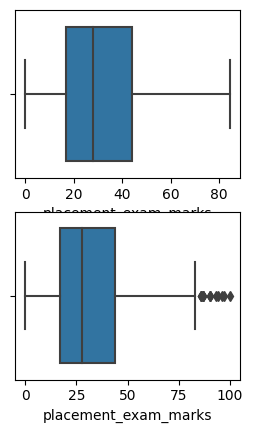

In [35]:
plt.Figure(figsize=(15,5))

plt.subplot(222)
sns.boxplot(x=new_df_cap['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x=df['placement_exam_marks'])